<h1><b>CSC10108 - TRỰC QUAN HÓA DỮ LIỆU</b></h1>
<h1 style='color:red;text-align:center;font-size:35px'><b>LAB-02: LÀM VIỆC VÀ TRỰC QUAN HÓA DỮ LIỆU CHUỖI THỜI GIAN</b></h1>

<b>Thông tin nhóm:

<li>PHAN XUÂN HOÀI – 20120481</li>

<li>PHAN PHONG LƯU - 20120326</li>

<li>LÂM NHỰT TRƯỜNG – 20120611</li>

<li>TRẦN MINH QUANG – 20120559</li>

**BẢNG PHÂN CHIA CÔNG VIỆC**


| MSSV  | Tên | Công việc hoàn thành|
|-------|-----|----------|
| 20120481  | PHAN XUÂN HOÀI  | Thu thập, khám phá và tiền xử lý dữ liệu |
| 20120326 | PHAN PHONG LƯU  |  1. Thực hiện một số trực quan và mô hình trên dữ liệu nhiệt độ  |
| 20120611   | LÂM NHỰT TRƯỜNG  | 2. Số lượng xe chia sẻ qua thời gian  |
| 20120559   | TRẦN MINH QUANG  | 3. Thể hiện trực quan một số dữ liệu biến đối theo thời gian<br>4. Sử dụng biểu đồ thời gian tương tác cho tập dữ liệu   |

<h1 style='color:#9482ed;text-align:center;font-size:30px'><b>Phần I - A.Thu thập dữ liệu</b></h1>

***Ngữ cảnh, câu chuyện gì khiến nhóm sinh viên thực hiện việc tìm kiếm dữ liệu?***    

Nhóm sinh viên quan tâm đến việc phân tích dữ liệu chuỗi thời gian trong lĩnh vực giao thông và đang tìm kiếm một bộ dữ liệu phù hợp. Sau khi tìm hiểu và đánh giá một số bộ dữ liệu, nhóm quyết định chọn London Bike Sharing dataset làm bộ dữ liệu chính để phân tích. Lý do chọn bộ dữ liệu này là vì nó cung cấp nhiều thông tin về việc sử dụng xe đạp công cộng trong thành phố London.

***Dữ liệu mà nhóm sinh viên là về chủ đề gì và được lấy từ nguồn nào?***

Dữ liệu mà chúng em chọn là dữ liệu về việc sử dụng xe đạp công cộng trong thành phố London được lấy từ [Kaggle](https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset?datasetId=376751).

***Người ta có cho phép sử dụng dữ liệu như thế này hay không? Ví dụ: cần kiểm
tra thử License của dữ liệu là gì?***

Người ta cho phép copy, chỉnh sửa, công bố, phân phối cũng như khai thác thông tin từ tập dữ liệu này.

***Người ta đã thu thập dữ liệu này như thế nào? Phương pháp thực hiện là gì?***

Tác giả không đề cập đến cách thức thu thập dữ liệu này.

<b><h2 style='color:#9482ed ;text-align:center;font-size:30px'>B. Khám phá dữ liệu</h2></b>

<h3 style='color:#8edc55'>1. Import các thư viện</h3>

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from ipywidgets import interact, IntSlider, Dropdown
sns.set_theme()

<h3 style='color:#8edc55'>2. Đọc dữ liệu</h3>

In [2]:
df = pd.read_csv('../datasets/london_merged.csv')
display(df.head())
print(df.shape)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


(17414, 10)


<h3 style='color:#8edc55'>3. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không? </h3>

* Mỗi dòng là thông tin về số lượng xe đạp được chia sẻ và thời tiết trong vòng 1 tiếng.
* Không có vấn đề các dòng có ý nghĩa khác nhau.

<h3 style='color:#8edc55'>4. Mỗi cột có ý nghĩa gì?</h3>

+ `timestamp`: trường thời gian để nhóm dữ liệu theo từng giờ
+ `cnt`: số lượng xe được chia sẻ
+ `t1`: nhiệt độ thực tế (độ C)
+ `t2`: nhiệt cảm nhận (độ C)
+ `hum`: độ ẩm
+ `wind_speed`: tốc độ gió (km/h)
+ `weather_code`: phân loại thời tiết:
    - 1: Trời trong / Hầu như trong nhưng có ít sương mù
    - 2: Mây rải rác / Ít mây
    - 3: Mây tan
    - 4: Nhiều mây
    - 7: Mưa / Mưa nhẹ/ Mưa rào nhẹ
    - 10: Mưa kèm theo giông
    - 26: Sương mù
    - 94: Sương mù đóng băng
+ `is_holiday`: 1: ngày lễ/ 0: không phải ngày lễ
+ `is_weekend`: 1: cuối tuần/ 0: không phải cuối tuần
+ `season`: phân loại các mùa:
    - 0: mùa xuân; 
    - 1: mùa hạ; 
    - 2: mùa thu; 
    - 3: mùa đông.

<h3 style='color:#8edc55'>5. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp
để có thể xử lý tiếp hay không?</h3>

In [3]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

> Các cột có kiểu dữ liệu phù hợp để tiếp tục xử lý

<h3 style='color:#8edc55'>6. Với mỗi cột, các giá trị (dạng số, dạng phân loại) được phân bố như thế nào?</h3>

<h3 style='color:#99dec6'>6.1 Các cột dữ liệu dạng số</h3>

Các cột dạng số: `cnt`, `t1`, `t2`, `hum`, `wind_speed`

DataFrame `summary_df` bên dưới chứa thông tin phân bố giá trị của các cột trên:

+ Tên của các cột là tên của các cột kiểu dữ liệu số trong `df`
+ ý nghĩa của mỗi dòng:
    + "missing_ratio": tỉ lệ phần trăm các giá trị thiếu
    + "count": số lượng giá trị
    + "mean": giá trị trung bình
    + "std": độ lệch chuẩn
    + "min": giá trị nhỏ nhất
    + "25%": giá trị phân vị 25%
    + "50%": giá trị phân vị 50%
    + "75%": giá trị phân vị 75%
    + "max": giá trị lớn nhất

In [4]:
summary_df = df[['cnt', 't1', 't2', 'hum', 'wind_speed']].describe().round(1)
missing_ratio = pd.DataFrame(df[['cnt', 't1', 't2', 'hum', 'wind_speed']].isna().sum() * 100/ len(df)).T.round(1)
missing_ratio = missing_ratio.set_axis(['missing_ratio'])
summary_df = pd.concat([missing_ratio, summary_df])
summary_df

,cnt,t1,t2,hum,wind_speed
missing_ratio,0.0,0.0,0.0,0.0,0.0
count,17414.0,17414.0,17414.0,17414.0,17414.0
mean,1143.1,12.5,11.5,72.3,15.9
std,1085.1,5.6,6.6,14.3,7.9
min,0.0,-1.5,-6.0,20.5,0.0
25%,257.0,8.0,6.0,63.0,10.0
50%,844.0,12.5,12.5,74.5,15.0
75%,1671.8,16.0,16.0,83.0,20.5
max,7860.0,34.0,34.0,100.0,56.5


<h3 style='color:#99dec6'>6.2 Các cột dữ liệu dạng phân loại</h3>

Các cột dữ liệu phân loại `weather_code`, `is_holiday`, `is_weekend`, `season`.

DataFrame `cat_df_info` bên dưới chứa thông tin phân bố giá trị của các cột trên:
+ Tên của các cột là tên của các cột kiểu dữ liệu số trong df
+ ý nghĩa của mỗi dòng:
    - `missing_ratio`: Tỉ lệ % các giá trị thiếu
    - `num_values`: Số lượng các giá trị khác nhau, không gồm giá trị thiếu
    - `value_ratios`: Tỉ lệ % của mỗi giá trị xuất hiện trong cột (không bao gồm giá trị thiếu).

In [5]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn

def missing_ratio(x):
    return (x.isna().mean()*100)
def num_values(x):
    return len(x.dropna().value_counts())
def value_ratios(x):
    count_value =  x.dropna().value_counts().sort_values(ascending=False)
    return (count_value/count_value.sum()*100).round(1).to_dict()

cat_df_info = df[['weather_code', 'is_holiday', 'is_weekend', 'season']].agg(func=[missing_ratio, num_values, value_ratios])
cat_df_info

,weather_code,is_holiday,is_weekend,season
missing_ratio,0.0,0.0,0.0,0.0
num_values,7,2,2,4
value_ratios,"{1.0: 35.3, 2.0: 23.2, 3.0: 20.4, 7.0: 12.3, 4.0: 8.4, 26.0: 0.3, 10.0: 0.1}","{0.0: 97.8, 1.0: 2.2}","{0.0: 71.5, 1.0: 28.5}","{0.0: 25.2, 1.0: 25.2, 3.0: 24.9, 2.0: 24.7}"


<h3 style='color:#8edc55'>7. Tiền xử lý</h3>

Từ DataFrame `summary_df` ta thấy cột `cnt` có vẻ bị  lệch phải. Ta sẽ kiểm tra và loại bỏ các điểm ngoại lai nếu có.

Trực quan phân phối của `cnt`

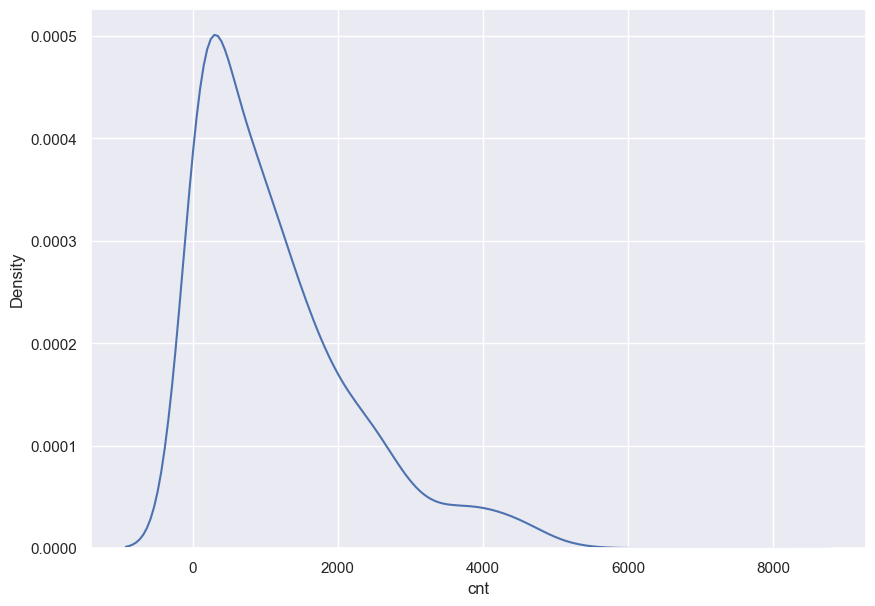

In [6]:
plt.figure(figsize=(10,7))
sns.kdeplot(data=df, x="cnt", bw_adjust=2)
plt.show()

Tính số lượng outlier

In [7]:
# tính tứ phân vị q1, q3
q1 = df['cnt'].quantile(0.25)
q3 = df['cnt'].quantile(0.75)

#iqr
iqr = q3 - q1

#cận trên và dưới
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

is_outlier = (df['cnt'] < lower) | (df['cnt'] > upper)
outlier_sum = is_outlier.sum()
print(f'Số lượng outlier của cột cnt: {outlier_sum}')

Số lượng outlier của cột cnt: 675


Xóa có dòng chứa outlier

In [8]:
df = df.drop(index=df.index[is_outlier])
df.shape

(16739, 10)

Kiểm tra các dòng có dữ liệu rỗng

In [9]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

> DataFrame `df` không cần tiền xử lý gì thêm!

<b><h2 style='color:#9482ed ;text-align:center;font-size:30px'>C. Khám phá mối quan hệ trong dữ liệu</h2></b>

<h3 style='color:#8edc55'>1. Tìm hiểu về dữ liệu nhiệt độ</h3>

<h4 style='color:#99dec6'>1.1 Nhiệt độ thay đổi như thế nào theo giờ và theo tháng?</h4>

Nhóm sử dụng heatmap để thể hiện mối quan hệ giữa nhiệt độ với ngày và tháng.

Xử lý dữ liệu: Gom nhóm dữ liệu nhiệt độ thực tế `t1` theo giờ và tháng, với giá trị tổng hợp là giá trị trung bình.

In [10]:
temp_df = pd.DataFrame()
temp_df['Hour'] = pd.to_datetime(df.timestamp).apply(lambda x: x.hour)
temp_df['Month'] = pd.to_datetime(df.timestamp).apply(lambda x: x.month)
temp_df['Temperature'] = df.t1
temp_df = temp_df.pivot_table(index='Hour', columns='Month', values='Temperature', aggfunc='mean')


Vẽ biểu đồ

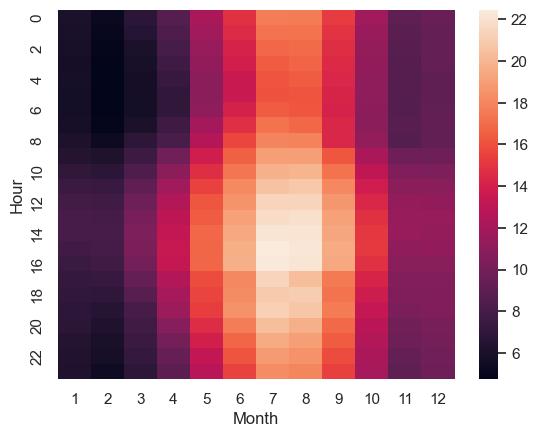

In [11]:
sns.heatmap(temp_df)
plt.show()

Thay đổi màu sắc và thêm một số chú thích để biểu đồ dễ đọc hơn

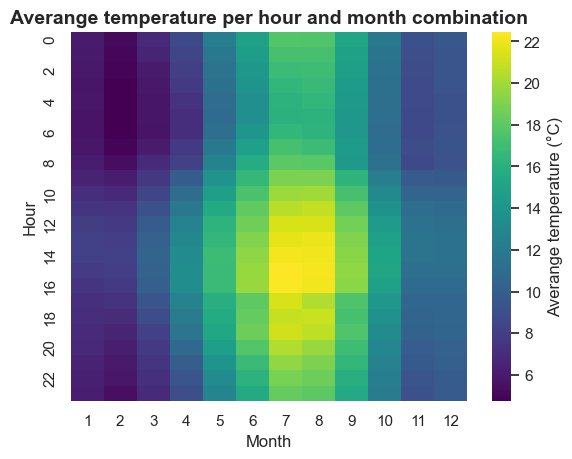

In [12]:
ax = sns.heatmap(temp_df, cmap='viridis', cbar_kws={'label': 'Averange temperature (°C)'})
plt.title('Averange temperature per hour and month combination', fontsize=14, fontweight='bold')
plt.show()

Nhận xét:
- Nhiệt độ cao hơn ở các tháng giữa năm (tháng 5-10) và thấp hơn ở các tháng đầu và cuối năm.
- Nhiệt độ cao hơn trong thời gian 8h-20h và thấp hơn khi vào ban đêm, sáng sơm.
- Tháng 7, 8 trong thời gian 12h-16h nhiệt độ ở mức cao nhất và thấp nhất vào tháng 2 lúc 2h-6h

Những kết luận này phù hợp kiến thức và kinh nghiệm trên thực tế, nhiệt độ cao vào mùa hè, thấp vào mùa đông, tăng lên vào ban ngày và giảm xuống vào ban đêm.

<h4 style='color:#99dec6'>1.2 Diễn biến nhiệt độ theo ngày</h4>

Chọn cột `t1` và `t2` là nhiệt độ thực tế và nhiệt độ cảm nhận.


Dữ liệu được gom nhóm theo ngày để đơn giản hơn trong quá trình xử lý và trực quan. Nhiệt độ trong ngày được tính theo trung bình nhiệt độ của từng giờ trong ngày đó.

In [13]:
temp_df = pd.concat([pd.to_datetime(df.timestamp), df.t1, df.t2], axis=1)
temp_df = temp_df.groupby(temp_df.timestamp.dt.date)[['t1', 't2']].mean().reset_index()

Thêm cột `diff` để thể hiện độ chênh lệch giữa nhiệt độ cảm nhận và nhiệt độ thực tế.

In [14]:
diff_temp = temp_df['t2'] - temp_df['t1']
temp_df['diff'] = diff_temp

Chọn cột `timestamp` làm index

In [15]:
temp_df.index = temp_df.timestamp
del temp_df['timestamp']
temp_df.head(5)

,t1,t2,diff
timestamp,,,
2015-01-04,2.479167,0.645833,-1.833333
2015-01-05,8.041667,6.708333,-1.333333
2015-01-06,7.854167,5.333333,-2.520833
2015-01-07,7.456522,4.500000,-2.956522
2015-01-08,9.750000,7.791667,-1.958333


Diễn biến của nhiệt độ thực tế, nhiệt độ cảm nhận và chênh lệch giữa hai nhiệt độ này theo ngày

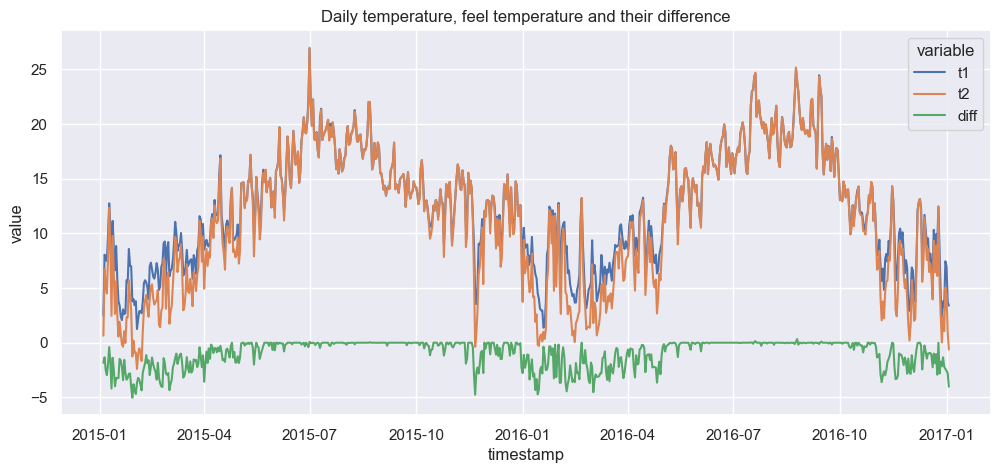

In [16]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='timestamp', y='value', hue='variable',
             data=pd.melt(temp_df.reset_index(), id_vars='timestamp'))
plt.title('Daily temperature, feel temperature and their difference')
plt.show()

Ta thấy dữ liệu nhiệt độ có sự biến động lớn giữa các ngày kề nhau. Nhóm chọn cách tổng hợp nhiệt độ trung bình nhiệt độ của 7 ngày để dễ quan sát xu hướng của dữ liệu.

In [17]:
rolling_days = 7
temp_rolling_mean = temp_df.rolling(rolling_days).mean()
temp_rolling_mean =  temp_rolling_mean.dropna()

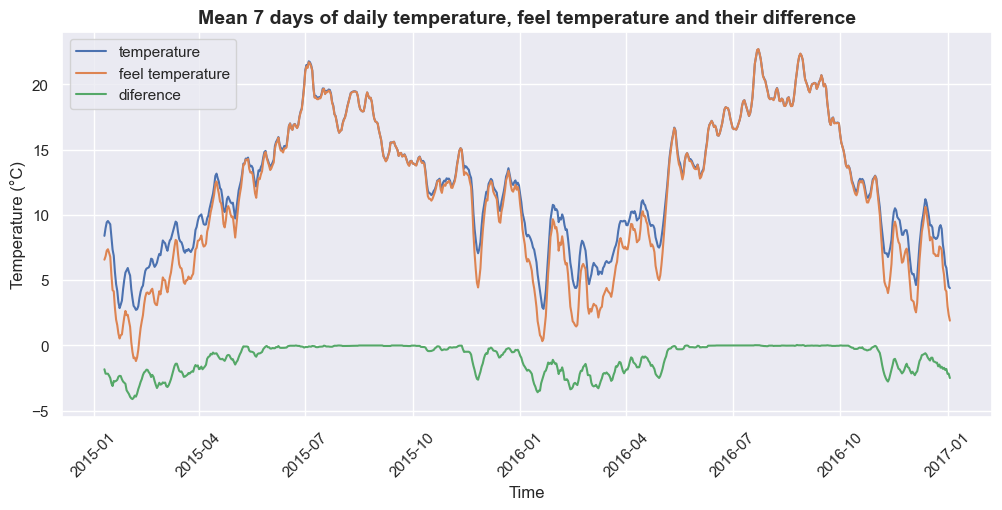

In [18]:
plt.figure(figsize=(12, 5))
ax = sns.lineplot(x='timestamp', y='value', hue='variable',
             data=pd.melt(temp_rolling_mean.reset_index(), id_vars='timestamp'))
legend_handles, _ = ax.get_legend_handles_labels()
ax.legend(legend_handles, ['temperature', 'feel temperature', 'diference'],
          title=None)
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title(f'Mean {rolling_days} days of daily temperature, feel temperature and their difference',
          fontsize=14, fontweight='bold')
plt.show()


Nhận xét nhiệt độ trung bình 7 ngày:
- Nhiệt độ cao nhất dưới 25°C và thấp nhất trên 0°C, trung bình khoảng 10-15°C
- Nhiệt độ cao hơn vào giữa năm và thấp hơn vào các tháng đầu năm và cuối năm.
- Nhiệt độ thực tế và nhiệt độ cảm nhận được không chênh lệch quá nhiều, thường dưới 5°C
- Những ngày nhiệt độ thấp thì cảm nhận thời tiết sẽ lạnh hơn vài °C, trong khi những ngày nhiệt độ cao thì cảm nhận và thực tế rất gần nhau, hiếm khi nhiệt độ cảm nhận cao hơn nhiệt độ thực tế. Điều này cho thấy người đi xe đạp dễ bị lạnh và thời tiết ở London thường xuyên mát mẻ, ít oi bức.

<h4 style='color:#99dec6'>1.3 Tính xu hướng và chu kỳ của dữ liệu</h4>

**Tính xu hướng (trend)**

Nhóm sử dụng đường hồi quy tuyến tính để xem xét xu hướng của nhiệt độ. Vì dữ liệu được thu thập trong thời gian chính xác 2 năm nên dữ liệu không bị ảnh hưởng bởi sự chênh lệch nhiệt độ giữa các mùa.

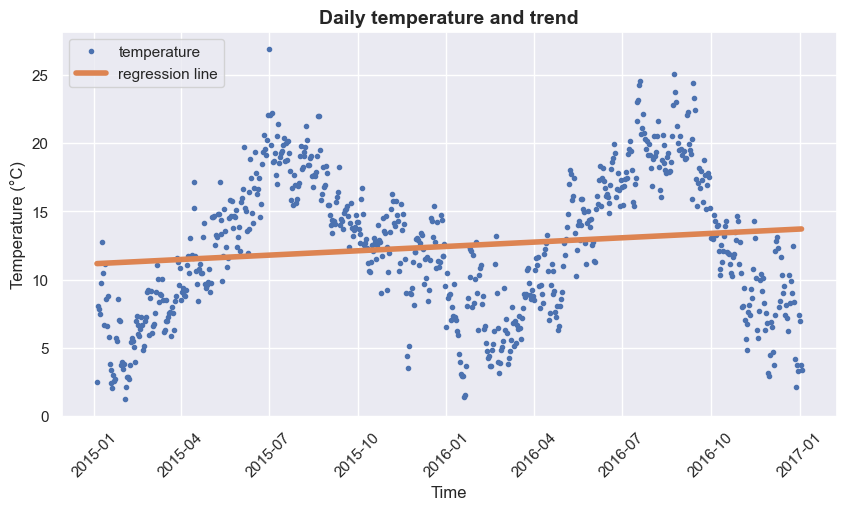

In [19]:
days = np.arange(len(temp_df))
trend = np.polyfit(days, temp_df.t1, 1)
trendline = np.polyval(trend, days)

plt.figure(figsize=(10, 5))
plt.plot(temp_df.index, temp_df.t1, '.')
plt.plot(temp_df.index, trendline, '-', linewidth=4)
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title(f'Daily temperature and trend',
          fontsize=14, fontweight='bold')
plt.legend(labels=['temperature', 'regression line'])
plt.show()


Nhìn vào đường hồi quy, ta có thể thấy xu hướng của nhiệt độ là tăng dần theo thời gian. Điều này cho thấy quá trình biến đổi khí hậu, ấm lên toàn cầu đang diễn ra và gây ảnh hưởng đến toàn thế giới.

**Tính chu kỳ (seasonality)**

Thông thường, chúng ta thường thấy rằng nhiệt độ có tính chu kỳ theo năm, cao vào mùa hè và thấp vào mùa đông. Dữ liệu của chúng ta cũng cho thấy điều đó. Vậy nhóm sẽ kiểm tra xem dữ liệu nhiệt độ có thực sự có tính chu kỳ hay không. 

Sử dụng chu kì là 365 ngày, phân rã dữ liệu nhiệt độ theo hàm cộng (vì biên độ biến động là như nhau trong hai năm). 

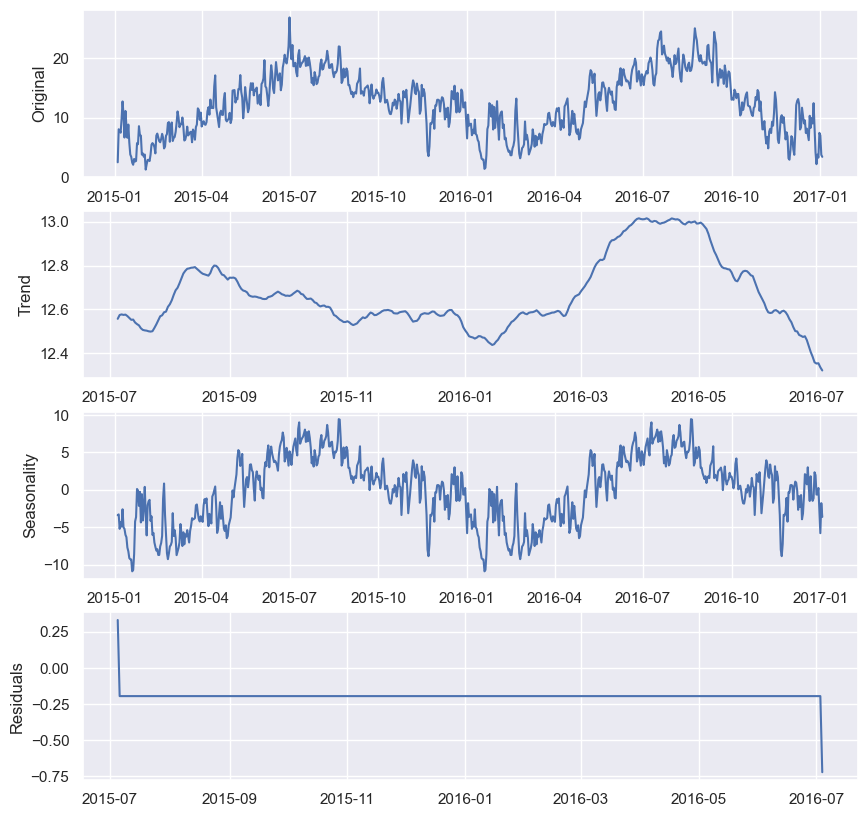

In [20]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(temp_df['t1'], model='additive', period=365)

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 10))
ax[0].plot(temp_df.t1)
ax[0].set_ylabel('Original')
ax[1].plot(decomposition.trend)
ax[1].set_ylabel('Trend')
ax[2].plot(decomposition.seasonal)
ax[2].set_ylabel('Seasonality')
ax[3].plot(decomposition.resid)
ax[3].set_ylabel('Residuals')
plt.show()


> Quan sát mô hình phân rã, có thể thấy mô hình này vẫn chưa đủ tốt vì đồ thị xu hưỡng vẫn còn nhiều biến động lớn và đồ thị mùa vụ không thể hiện rõ chu kì theo năm. Nhóm đã thử lấy chu kỳ khác và tính trung bình nhiều ngày hơn những không có kết quả khả quan. Điều này có thể do dữ liệu chưa đủ nhiều năm hoặc/và dữ liệu nhiệt độ này chưa thể hiện rõ tính chu kỳ.

<h4 style='color:#99dec6'>1.5 Mối quan hệ giữa nhiệt độ và số lượng người chia sẻ</h4>

Trước hêt, chúng ta cần tính tổng số lượng xe được chia sẻ mỗi ngày, sau đó gộp với dataframe `temp_df`

In [21]:
cnt_df = pd.concat([pd.to_datetime(df.timestamp), df.cnt], axis=1)
cnt_df = cnt_df.groupby(cnt_df.timestamp.dt.date)['cnt'].sum()
temp_df['cnt'] = cnt_df

Vẽ đồ thị phân tán thể hiển mối quan hệ giữa nhiệt độ `t1` và số lượng xe `cnt`

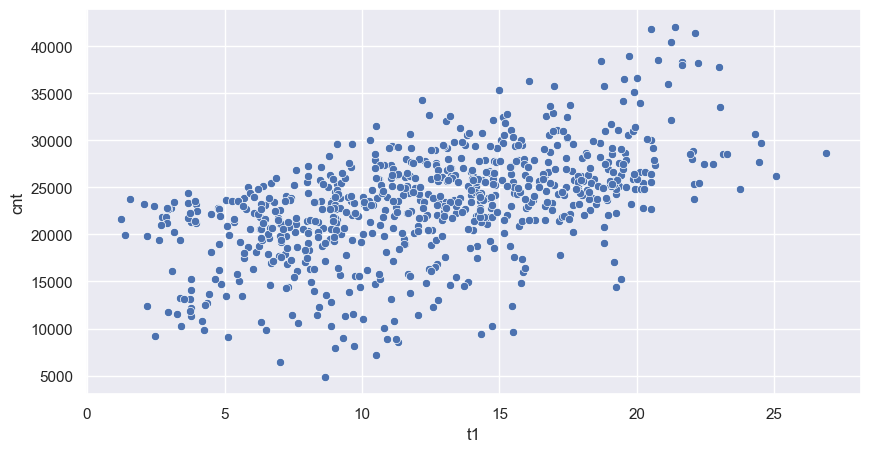

In [22]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=temp_df['t1'], y=temp_df['cnt'])
plt.show()

> Chúng ta có thể thấy mối quan hệ tuyến tính thuận giữa hai biến này, mặc dù độ lệch khá lớn.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Chia dữ liệu thành tập huấn luyện và tập kiểm nghiệm. Kích thước tập kiểm nghiệm là 0.3

In [24]:
X = np.array(temp_df['t1']).reshape(-1, 1)
y = np.array(temp_df['cnt']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Huấn luyện mô hình

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Score:', model.score(X_test, y_test))

Score: 0.3145832014396428


> Điểm số là 0.315, không cao nhưng có thể chấp nhận được.

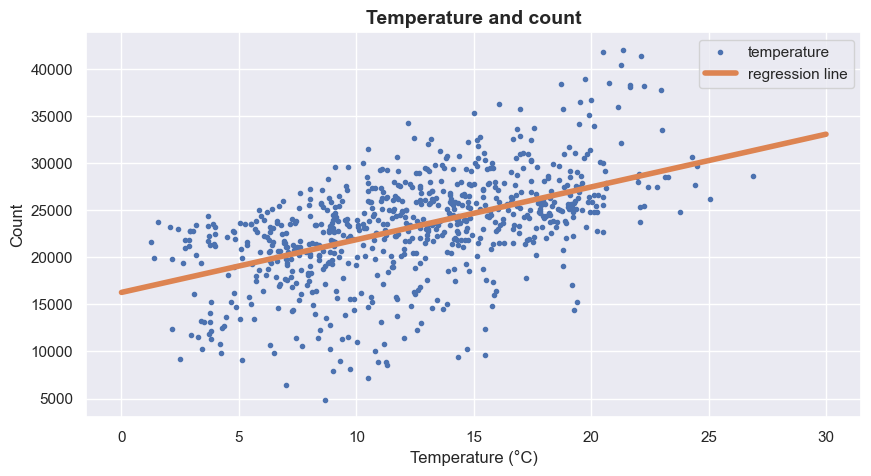

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(temp_df.t1, temp_df.cnt, '.')
plt.plot([0, 30], model.predict(np.array([[0], [30]])), '-', linewidth=4)
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.title(f'Temperature and count',
          fontsize=14, fontweight='bold')
plt.legend(labels=['temperature', 'regression line'])
plt.show()


Dự đoán số lượng xe chia sẻ khi nhiệt độ là 20°C

In [27]:
print('Prediction at 20°C: %.0f' % model.predict([[20]]))

Prediction at 20°C: 27499


Thay mô hình bằng nhiệt độ cảm nhận được `t2`

In [28]:
X = np.array(temp_df['t2']).reshape(-1, 1)
y = np.array(temp_df['cnt']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
print('Score:', model.score(X_test, y_test))

Score: 0.3204215474672456


> Điểm số là 0.320, cao hơn so với model cũ. Vậy mô hình này tốt hơn và cho thấy số lượng xe chia sẻ phụ thuộc vào nhiệt độ cảm nhận được nhiều hơn là nhiệt độ thực tế.

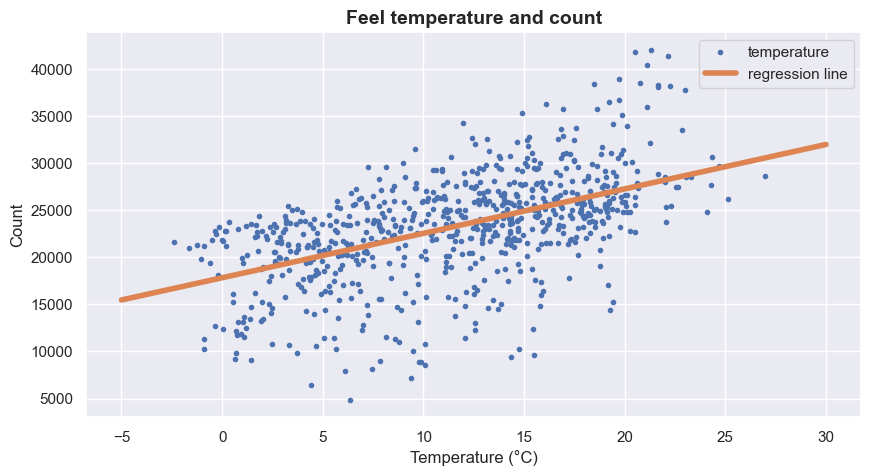

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(temp_df.t2, temp_df.cnt, '.')
plt.plot([-5, 30], model.predict(np.array([[-5], [30]])), '-', linewidth=4)
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.title(f'Feel temperature and count',
          fontsize=14, fontweight='bold')
plt.legend(labels=['temperature', 'regression line'])
plt.show()


Dự đoán số lượng xe chia sẻ khi nhiệt độ là 20°C

In [30]:
print('Prediction at 20°C: %.0f' % model.predict([[20]]))


Prediction at 20°C: 27292


<h3 style='color:#8edc55'>2. Số lượng xe chia sẻ qua thời gian</h3>

In [31]:
# set timestamp là index của dữ liệu
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.set_index("timestamp")

# In ngày gần nhất và sớm nhất của dataset
print("Earliest date in dataset: {}".format(min(df.index)))
print("Latest date in dataset: {}".format(max(df.index)))

Earliest date in dataset: 2015-01-04 00:00:00
Latest date in dataset: 2017-01-03 23:00:00


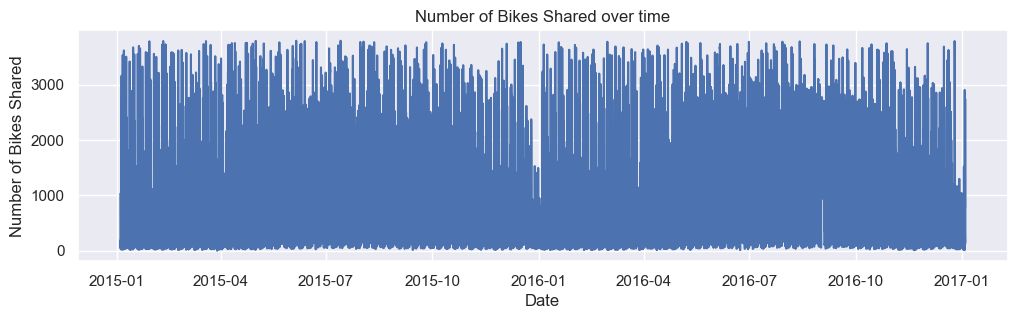

In [32]:
# Trực quan số lượng xe được chia sẻ
fig = plt.figure(figsize = (12,3))
plt.plot(df.index, df['cnt'])
plt.xlabel('Date')
plt.ylabel('Number of Bikes Shared')
plt.title('Number of Bikes Shared over time')
plt.show()

**Nhận xét**
- Với biểu đồ trên thì rất khó để hiều hơn về bộ dữ liệu, nhưng chúng ta vẫn có thể quan sát được có hai mùa cao điểm thông qua biểu đồ

<h4 style='color:#99dec6'>2.1 Số lượng xe chia sẻ trong ngày hành chính</h4>

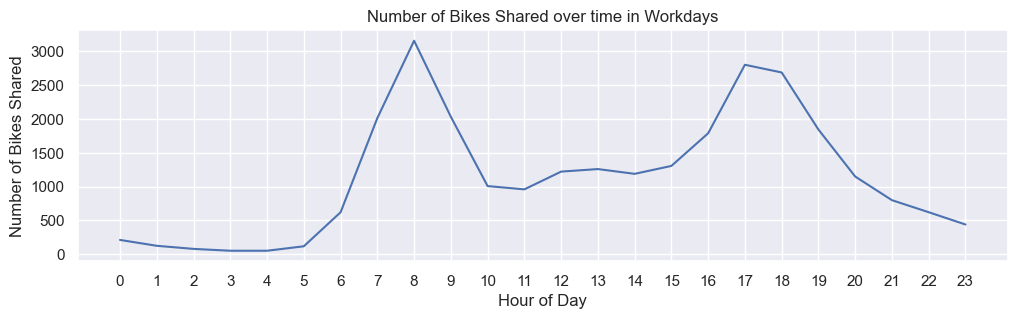

In [33]:
# Dữ liệu cho ngày hành chính 
dataForWorkdays = df[(df["is_holiday"] == 0) & (df["is_weekend"] == 0)]

data_workdays_hourly = dataForWorkdays.groupby(dataForWorkdays.index.hour)['cnt'].mean()

fig = plt.figure(figsize = (12,3))
plt.plot(data_workdays_hourly.index, data_workdays_hourly.values)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Bikes Shared')
plt.title('Number of Bikes Shared over time in Workdays')

plt.xticks(range(0,24))

plt.show()

**Nhận xét**
- Với ngày hành chính thì số lượng xe được chia sẽ có "giờ cao điểm" là buổi sáng lúc 8h và buổi chiều lúc 5h, đây cũng là lúc mọi người đi làm và tan làm ra.

<h3 style='color:#8edc55'>3. Thể hiện trực quan một số dữ liệu biến đối theo thời gian.</h3>

<h4 style='color:#99dec6'>3.1 Biểu đồ tích lũy của từng loại thời tiết theo thời gian</h4>

Sử dụng biểu đồ đường thể hiện sự tích lũy về số lượng của từng loại weather code theo thời gian.

**Mục đích** 
- Biểu đồ này thể hiện sự tích lũy (tăng dần) của số lượng từng loại thời tiết theo thời gian. Biểu đồ cho thấy xu hướng tích lũy số lượng các loại thời tiết diễn ra qua thời gian, giúp nhìn thấy mức độ thay đổi và sự phân bố của các loại thời tiết trong tập dữ liệu.

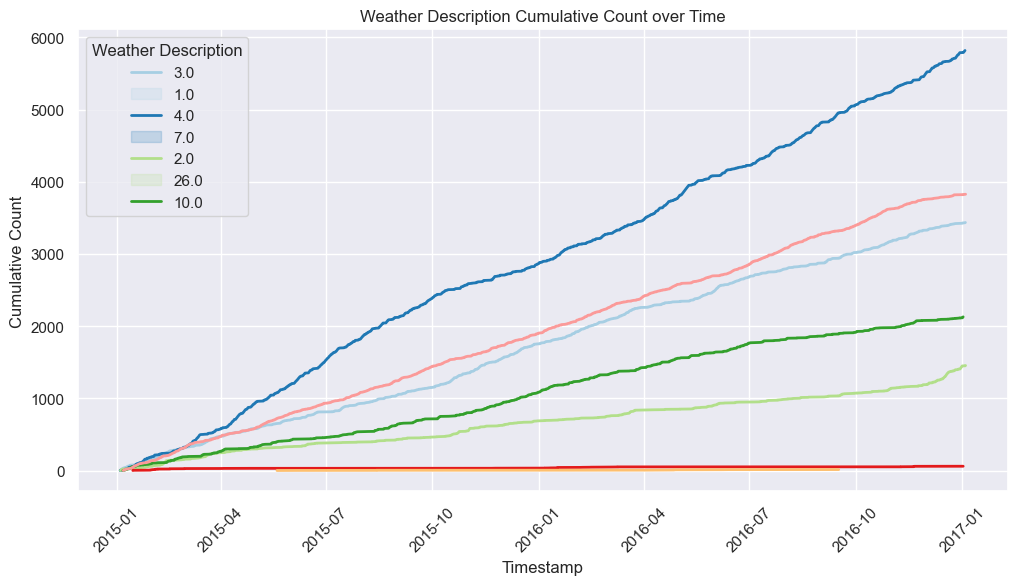

In [34]:
# Tạo DataFrame chứa số lượng tích lũy của từng loại thời tiết theo thời gian
weather_code_cumulative = df.groupby(['timestamp', 'weather_code']).size().groupby(level=1).cumsum().reset_index(name='cumulative_count')

# Tạo một bảng màu tương phản
color_palette = sns.color_palette("Paired", n_colors=len(pd.unique(df['weather_code'])))

# Vẽ biểu đồ đường cho số lượng tích lũy của từng loại thời tiết theo thời gian
plt.figure(figsize=(12, 6))
for i, desc in enumerate(pd.unique(df['weather_code'])):
    subset = weather_code_cumulative[weather_code_cumulative['weather_code'] == desc]
    sns.lineplot(data=subset, x='timestamp', y='cumulative_count', color=color_palette[i], linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('Cumulative Count')
plt.title('Weather Description Cumulative Count over Time')
plt.xticks(rotation=45)
plt.legend(title='Weather Description', labels=pd.unique(df['weather_code']))
plt.show()

**Nhận xét**
- Các loại thời tiết có sự tăng dần về số lượng tích lũy theo thời gian. Bên cạnh đó cũng có các loại thời tiết hầu như không có sự thay đổi theo thời gian. Điều này giúp ta biết được loại hình thời tiết nào thường xảy ra cũng như hiểm xảy ra
- Cung cấp cái nhìn tổng quan về sự phân bố và mức độ phổ biến của các loại thời tiết trong tập dữ liệu. Ta có thể so sánh sự tích lũy của các loại thời tiết và đánh giá mức độ quan trọng của từng loại trong mô hình thời tiết

**Biểu đồ cung cấp cái nhìn tổng quan về sự phân bố và mức độ phổ biến của các loại thời tiết trong tập dữ liệu. Ta có thể so sánh sự tích lũy của các loại thời tiết và đánh giá mức độ quan trọng của từng loại trong mô hình thời tiết.**

<h4 style='color:#99dec6'>3.2 Biểu đồ biến đổi của hai biến động vật lý - tốc độ gió (wind speed) và độ ẩm (humidity) - theo thời gian</h4>

Biểu đồ sử dụng đường (line plot) để biểu diễn sự thay đổi của các biến này qua các điểm dữ liệu trong tập dữ liệu theo thời gian.

**Mục đích**

- Trực quan hóa và so sánh sự biến đổi của wind speed và humidity theo thời gian. Điều này giúp nhìn thấy xu hướng, sự biến đổi và tương quan giữa hai biến này.

- Đánh giá mức độ biến động của wind speed và humidity. Bằng cách xem biểu đồ, ta có thể nhận ra sự dao động, sự không ổn định và mức độ biến thiên của hai biến đối với thời gian.

- Xác định các điểm nổi bật hoặc xu hướng đặc biệt của wind speed và humidity. Có thể nhận ra các mô hình, đỉnh điểm, sự tăng giảm nhanh chóng hoặc các biến đổi đáng chú ý khác trong dữ liệu.

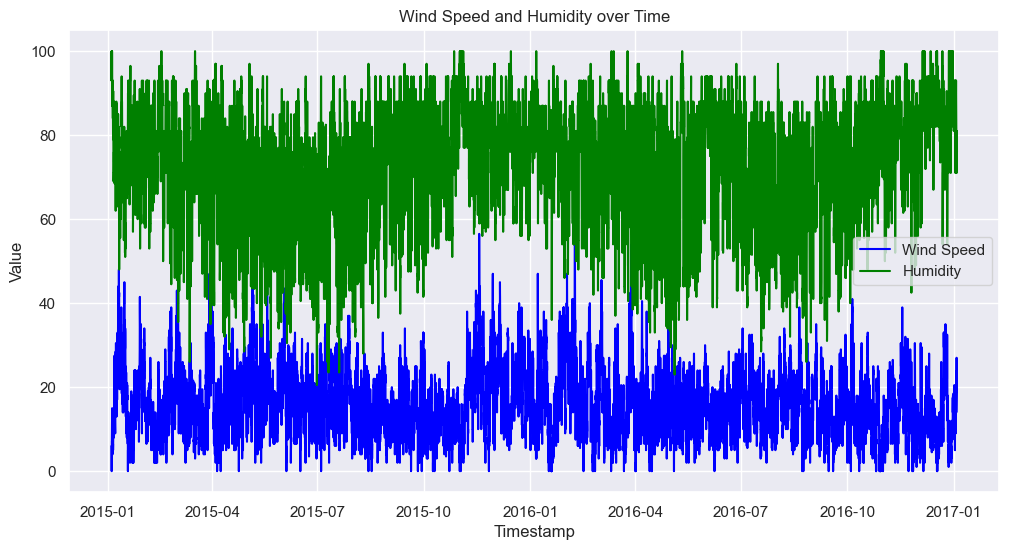

In [35]:
#Đọc dữ liệu
df = pd.read_csv('../datasets/london_merged.csv')

# Chuyển đổi cột timestamp sang định dạng thời gian
df['timestamp'] = pd.to_datetime(df['timestamp'])


# Tạo DataFrame chứa các cột 'timestamp', 'wind_speed' và 'hum'
data = df[['timestamp', 'wind_speed', 'hum']]

# Thiết lập kích thước của hình vẽ
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ cho wind_speed
sns.lineplot(data=data, x='timestamp', y='wind_speed', color='blue', label='Wind Speed')

# Vẽ biểu đồ cho hum
sns.lineplot(data=data, x='timestamp', y='hum', color='green', label='Humidity')

# Đặt tiêu đề và các nhãn cho biểu đồ
plt.title('Wind Speed and Humidity over Time')
plt.xlabel('Timestamp')
plt.ylabel('Value')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

**Nhận xét**
- Tốc độ gió (wind speed) có xu hướng biến đổi không đều qua thời gian. Có những đoạn thời gian tốc độ gió tăng lên và sau đó giảm đi, đồng thời cũng có những khoảng thời gian tốc độ gió ổn định. Điều này cho thấy sự biến đổi tự nhiên của tốc độ gió trong tập dữ liệu.
- Độ ẩm (humidity) có mức độ biến đổi thấp hơn so với tốc độ gió. Điều này cho thấy độ ẩm thay đổi ít qua thời gian và có xu hướng ổn định hơn. Tuy nhiên, vẫn có những khoảng thời gian có sự biến động đáng kể trong độ ẩm.
- Có một đoạn thời gian tốc độ gió và độ ẩm đồng thời tăng lên, đồng thời cũng có những khoảng thời gian mà tốc độ gió tăng lên trong khi độ ẩm giảm đi. Điều này có thể cho thấy một mối tương quan giữa tốc độ gió và độ ẩm trong một số trường hợp.

**Biểu đồ cung cấp một cái nhìn trực quan về sự biến đổi của tốc độ gió và độ ẩm theo thời gian. Từ đó, ta có thể đánh giá được xu hướng, mức độ biến đổi và mối quan hệ giữa hai biến này trong tập dữ liệu.**

<h3 style='color:#8edc55'>4. Sử dụng biểu đồ thời gian tương tác cho tập dữ liệu</h3>

<h4 style='color:#99dec6'>4.1 Sử dụng kĩ thuật Facet</h4>

Sử dụng kĩ thuật Facet chia dữ liệu thành các phân nhóm dựa trên yếu tố phân loại như mùa, thời tiết, ngày lễ, cuối tuần.

**Ý nghĩa mang lại**
- Hiển thị đồ thị theo phân nhóm: Giúp hiển thị đồ thị cho từng phân nhóm riêng biệt, tạo ra một cái nhìn tổng quan về sự biến đổi dữ liệu theo các yếu tố này
- So sánh sự khác biệt: Bằng cách hiển thị các đồ thị con cho từng phân nhóm, chúng ta có thể dễ dàng so sánh sự khác biệt giữa các nhóm phân loại. Ví dụ, ta có thể so sánh sự biến đổi số lượng xe chia sẻ theo mùa, thấy rõ sự khác biệt giữa các mùa và hiểu được cách mà số lượng xe chia sẻ thay đổi theo từng mùa
- Tính tương tác: Kỹ thuật Facet cho phép người dùng tương tác với các đồ thị con, điều chỉnh các yếu tố phân loại và quan sát sự thay đổi của dữ liệu theo thời gian và yếu tố phân loại. Điều này giúp khám phá dữ liệu một cách linh hoạt và tìm hiểu thêm về mối quan hệ giữa các biến trong tập dữ liệu

In [36]:
# Chuyển đổi cột timestamp sang định dạng thời gian
df['timestamp'] = pd.to_datetime(df['timestamp'])

#Hàm để vẽ biểu đồ line plot với các yếu tố phân loại
def plot_line_plot_facet(x):
    # Tạo đối tượng FacetGrid với dữ liệu df
    grid = sns.FacetGrid(df, col=x, col_wrap=2, height=7)

    # Áp dụng hàm map để vẽ biểu đồ line plot cho từng yếu tố phân loại
    grid.map(sns.lineplot, 'timestamp', 'cnt')

    # Đặt tên trục x, trục y và tiêu đề cho từng plot
    grid.set_axis_labels('Timestamp', 'Count')
    grid.set_titles('{col_name}')

    # Hiển thị biểu đồ
    plt.show()

# Tạo giao diện tương tác với các yếu tố phân loại
interact(plot_line_plot_facet, x=Dropdown(options=['season', 'weather_code', 'is_holiday', 'is_weekend']))

interactive(children=(Dropdown(description='x', options=('season', 'weather_code', 'is_holiday', 'is_weekend')…

<function __main__.plot_line_plot_facet(x)>

**Nhận xét**: Với mỗi lựa chọn phân loại, chúng ta thấy được sự khác nhau về số lượng xe được chia sẻ theo thời gian, từ đó có những nhận xét tổng quát về tập dữ liệu.

Ví dụ như với phân loại **is_holiday**, chúng ta thấy được sự khác nhau rõ ràng về số lượng xe được chia sẻ giữa ngày thường và ngày lễ.

<h4 style='color:#99dec6'>4.2 Sử dụng kĩ thuật Manipulate View</h4>

**Manipulate View** là một kỹ thuật trong việc trình diễn dữ liệu, cho phép người dùng tương tác và điều chỉnh các thông số để thay đổi hiển thị dữ liệu một cách trực tiếp

**Ý nghĩa mang lại**
- Cho phép người dùng tương tác và điều chỉnh các thông số để thay đổi hiển thị dữ liệu một cách trực tiếp. 

- Thể hiện tính tương tác và linh hoạt trong việc khám phá dữ liệu, cho phép người dùng điều chỉnh các thông số và quan sát kết quả ngay lập tức, từ đó giúp hiểu sâu hơn về dữ liệu và đưa ra những phân tích, nhận định, và quyết định dựa trên sự tương tác và thay đổi thông số.

Trong phần này, chúng ta sẽ áp dụng **Manipulate View** cho các trường dữ liệu timestamp, weather_code, is_holiday, is_weekend, season.

In [37]:
# Chuyển đổi cột timestamp sang định dạng thời gian
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Hàm để vẽ biểu đồ line plot với các tham số tương tác
def plot_line_plot(start_date, end_date, weather_code, is_holiday, is_weekend, season):
    start_time = pd.to_datetime(start_date)
    end_time = pd.to_datetime(end_date)
    # Lọc dữ liệu dựa trên các tham số tương tác
    filtered_df = df[
        (df['timestamp'] >= start_time) &
        (df['timestamp'] <= end_time) &
        (df['weather_code'] == weather_code) &
        (df['is_holiday'] == is_holiday) &
        (df['is_weekend'] == is_weekend) &
        (df['season'] == season)
    ]
    
    # Định nghĩa palette màu sắc cho từng biểu đồ
    palette = sns.color_palette("husl", len(filtered_df['timestamp'].dt.year.unique()))
    
    # Vẽ biểu đồ line plot với màu sắc đẹp hơn
    plt.figure(figsize=(12, 6))
    for year, color in zip(filtered_df['timestamp'].dt.year.unique(), palette):
        year_data = filtered_df[filtered_df['timestamp'].dt.year == year]
        plt.plot(year_data['timestamp'], year_data['cnt'], label=year, color=color)
    
    plt.xlabel('Timestamp')
    plt.ylabel('Count')
    plt.title('Bike Sharing Count over Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

# Tạo giao diện tương tác với các thông số
interact(plot_line_plot,
         start_date=Dropdown(options=pd.unique(df['timestamp'].dt.date)),
         end_date=Dropdown(options=pd.unique(df['timestamp'].dt.date)),
         weather_code=IntSlider(min=1, max=26, step=1, value=1),
         is_holiday=IntSlider(min=0, max=1, step=1, value=0),
         is_weekend=IntSlider(min=0, max=1, step=1, value=0),
         season=IntSlider(min=0, max=3, step=1, value=0))

interactive(children=(Dropdown(description='start_date', options=(datetime.date(2015, 1, 4), datetime.date(201…

<function __main__.plot_line_plot(start_date, end_date, weather_code, is_holiday, is_weekend, season)>

**Nhận xét**
- Cho phép người dùng linh hoạt điều chỉnh các thông số và tùy chỉnh biểu đồ theo ý muốn. Người dùng có thể thay đổi phạm vi thời gian, chọn loại thời tiết, ngày lễ, cuối tuần hoặc mùa, và xem kết quả được cập nhật ngay lập tức. Điều này giúp người dùng tiếp cận và khám phá dữ liệu theo các góc nhìn khác nhau và tạo ra những phân tích sâu hơn.
- Giúp người dùng hiểu rõ hơn về tập dữ liệu và các yếu tố ảnh hưởng đến số lượng xe được chia sẻ theo thời gian.